Refrences:https://www.kaggle.com/code/faldoae/exploratory-data-analysis-eda-for-image-datasets

https://medium.com/latinxinai/convolutional-neural-network-from-scratch-6b1c856e1c07

In [1]:
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


In [2]:

os.environ['KAGGLE_USERNAME'] = "mohamedehab220" # Replace with your username
os.environ['KAGGLE_KEY'] = "KGAT_db6773bad4d83b4b2ce1f9a28e032425"       # Replace with your long API key

In [3]:
!kaggle datasets download -d dumitrux/architectural-styles-dataset

Dataset URL: https://www.kaggle.com/datasets/dumitrux/architectural-styles-dataset
License(s): CC0-1.0
 98% 1.52G/1.56G [00:29<00:00, 51.0MB/s]
100% 1.56G/1.56G [00:29<00:00, 56.3MB/s]


In [4]:
!unzip architectural-styles-dataset.zip -d architecture_data

Streaming output truncated to the last 5000 lines.
  inflating: architecture_data/g-images-dataset/Achaemenid architecture/000553.jpg  
  inflating: architecture_data/g-images-dataset/Achaemenid architecture/000554.jpg  
  inflating: architecture_data/g-images-dataset/Achaemenid architecture/000555.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000968.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000970.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000973.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000975.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000976.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000977.jpg  
  inflating: architecture_data/g-images-dataset/American Foursquare architecture/000978.jpg  
  inflating: architecture_data/g-ima

In [5]:

data = '/content/architecture_data/architectural-styles-dataset'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)
df

,Class,Images
0,Achaemenid architecture,321_800px-Kabe_Zartosht-1.JPG
1,Achaemenid architecture,000180.jpg
2,Achaemenid architecture,687_800px-Apadana_palace_persepolis.JPG
3,Achaemenid architecture,000245.jpg
4,Achaemenid architecture,000024.jpg
...,...,...
10108,Tudor Revival architecture,376_800px-Palacio_de_la_Magdalena_%28Santander...
10109,Tudor Revival architecture,014585.jpg
10110,Tudor Revival architecture,935_746px-Spalding_St_Andrew_from_S_3.JPG
10111,Tudor Revival architecture,014422.jpg


In [6]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 10113
Class Count : 25 

Count the number of images in each class
Class
Queen Anne architecture             720
Art Nouveau architecture            615
Art Deco architecture               566
Greek Revival architecture          523
Colonial architecture               480
Baroque architecture                456
Tudor Revival architecture          455
Beaux-Arts architecture             424
International style                 417
Ancient Egyptian architecture       406
Achaemenid architecture             392
Novelty architecture                382
Georgian architecture               381
American craftsman style            364
American Foursquare architecture    362
Russian Revival architecture        352
Palladian architecture              343
Deconstructivism                    335
Gothic architecture                 331
Postmodern architecture             322
Bauhaus architecture                315
Byzantine architecture              313

In [ ]:
# base_path = '/content/architecture_data/architectural-styles-dataset'
# data = []
# for style in os.listdir(base_path):
#     style_path = os.path.join(base_path, style)
#     if os.path.isdir(style_path):
#         for img in os.listdir(style_path):
#             data.append({'Path': os.path.join(style_path, img), 'Class': style})

# df = pd.DataFrame(data)

# # 2. Visualize Class Distribution (Requirement: Data Exploration)
# plt.figure(figsize=(15, 6))
# sns.countplot(data=df, x='Class', palette='viridis')
# plt.xticks(rotation=45, ha='right')
# plt.title('Distribution of Architectural Styles')
# plt.show()

# # 3. Display Sample Images
# plt.figure(figsize=(12, 8))
# for i, style in enumerate(df['Class'].unique()[:8]): # Show first 8 styles
#     sample_path = df[df['Class'] == style]['Path'].iloc[0]
#     plt.subplot(2, 4, i + 1)
#     plt.imshow(load_img(sample_path))
#     plt.title(style)
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

/tmp/ipython-input-4057982934.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', order=target_styles, palette='viridis')


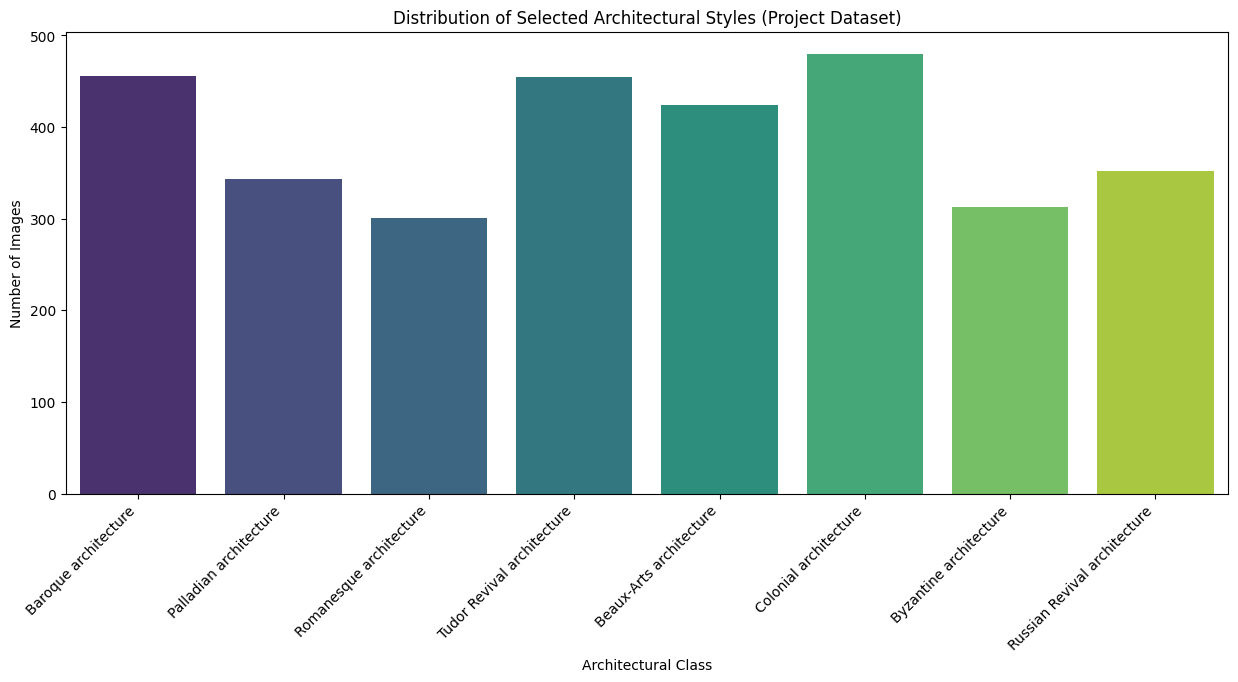

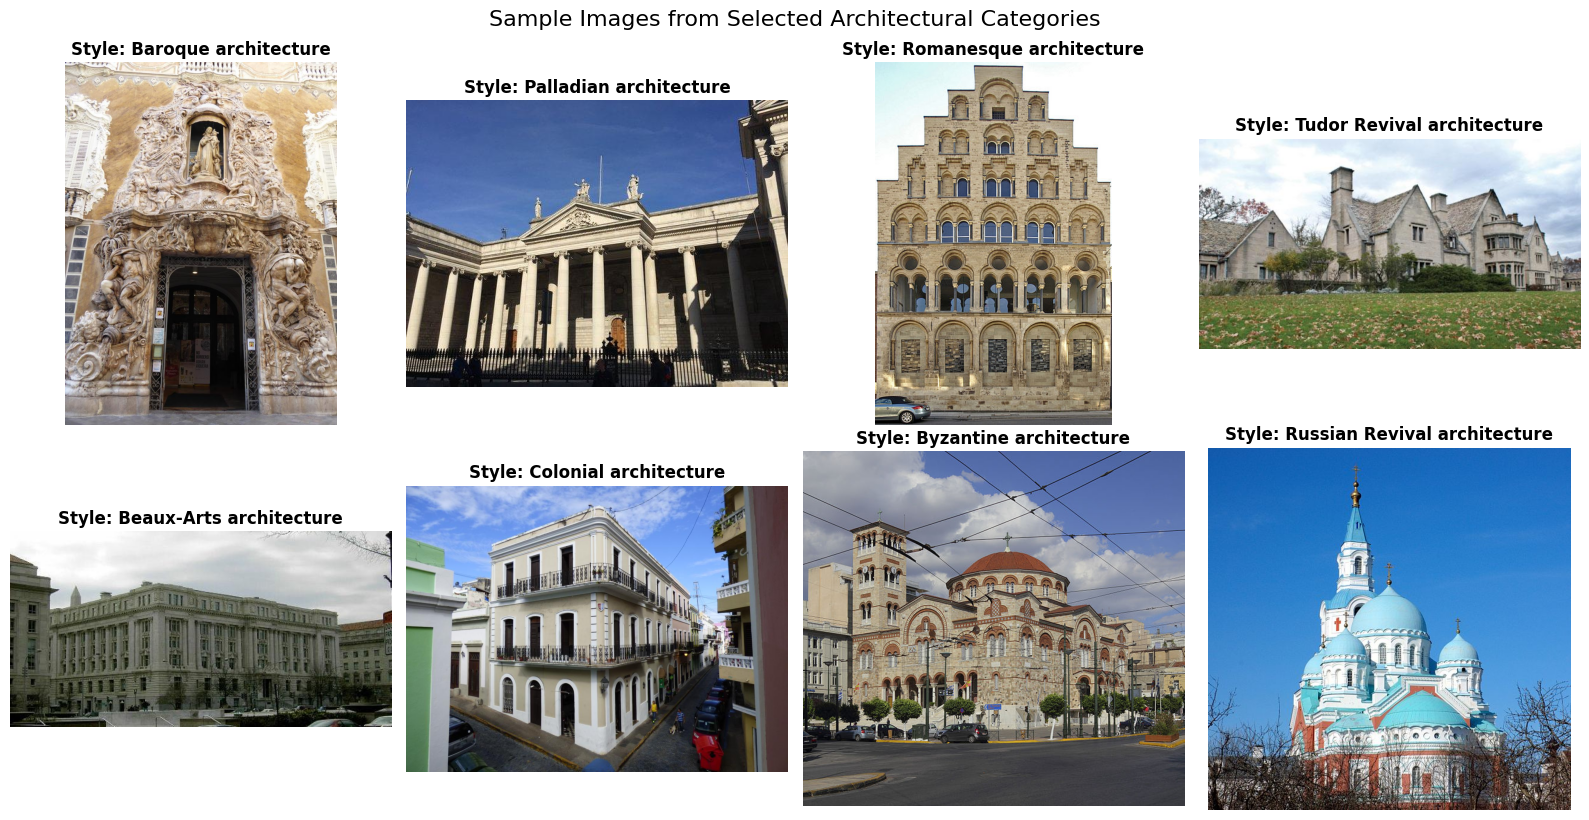

In [7]:
target_styles = [
    'Baroque architecture', 'Palladian architecture', 'Romanesque architecture', 'Tudor Revival architecture',
    'Beaux-Arts architecture', 'Colonial architecture', 'Byzantine architecture', 'Russian Revival architecture'
]

# Update this path to match your folder structure
base_path = '/content/architecture_data/architectural-styles-dataset'
data = []

# Loop through folders and only add the styles in your list
for style in target_styles:
    style_path = os.path.join(base_path, style)
    if os.path.isdir(style_path):
        for img in os.listdir(style_path):
            # Filtering to ensure we only grab common image formats
            if img.lower().endswith(('.png', '.jpg', '.jpeg')):
                data.append({'Path': os.path.join(style_path, img), 'Class': style})
    else:
        print(f"Warning: Folder for {style} not found at {style_path}")

df = pd.DataFrame(data)

# 2. Visualize Class Distribution (Requirement: Data Exploration)
# This will show the count for ONLY your 8 chosen styles
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Class', order=target_styles, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Selected Architectural Styles (Project Dataset)')
plt.xlabel('Architectural Class')
plt.ylabel('Number of Images')
plt.show()

# 3. Display Sample Images (One from each of the 8 styles)
# This provides the "Clear explanation" for your data exploration section
plt.figure(figsize=(16, 8))
for i, style in enumerate(target_styles):
    # Get the first image path for the specific style
    sample_series = df[df['Class'] == style]['Path']
    if not sample_series.empty:
        sample_path = sample_series.iloc[0]
        plt.subplot(2, 4, i + 1)
        plt.imshow(load_img(sample_path))
        plt.title(f"Style: {style}", fontsize=12, fontweight='bold')
        plt.axis('off')

plt.tight_layout()
plt.suptitle('Sample Images from Selected Architectural Categories', fontsize=16, y=1.02)
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Project Requirement: Training/Testing Split
)

train_gen = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=target_styles,
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=target_styles,
    shuffle=True
)

Found 2502 images belonging to 8 classes.
Found 622 images belonging to 8 classes.


In [ ]:

# Load Pre-trained Model (Transfer Learning Requirement)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Freeze base layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Helps with "Discussing signs of overfitting"
    # layers.Dense(len(train_gen.class_indices), activation='softmax')
    layers.Dense(8, activation='softmax')
])
learning_rate = 1e-4

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Requirement: Architecture Summary
model.summary()

# Requirement: Training with Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10, # You will need to experiment with this number for the report
    callbacks=[early_stop]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.3757 - loss: 1.7484 - val_accuracy: 0.5836 - val_loss: 1.1716
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5570 - loss: 1.2075 - val_accuracy: 0.6222 - val_loss: 1.0882
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.6254 - loss: 1.0497 - val_accuracy: 0.6367 - val_loss: 1.0083
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.6437 - loss: 1.0118 - val_accuracy: 0.6447 - val_loss: 0.9733
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.6616 - loss: 0.9533 - val_accuracy: 0.6527 - val_loss: 0.9527
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.6767 - loss: 0.9054 - val_accuracy: 0.6399 - val_loss: 1.0023
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.7110 - loss: 0.8627 - val_accuracy: 0.6463 - val_loss: 0.9420
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.6986 - loss: 0.8193 - val_accuracy: 0.6367 - v

In [ ]:
# Unfreeze top layers of MobileNetV2
base_model.trainable = True

for layer in base_model.layers[:-40]:
    layer.trainable = False
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.7426 - loss: 0.7285 - val_accuracy: 0.6431 - val_loss: 0.9927
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.7444 - loss: 0.7336 - val_accuracy: 0.6640 - val_loss: 0.9578
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.7410 - loss: 0.6991 - val_accuracy: 0.6608 - val_loss: 0.9832
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.7592 - loss: 0.6843 - val_accuracy: 0.6447 - val_loss: 1.0141
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.7716 - loss: 0.6528 - val_accuracy: 0.6399 - val_loss: 0.9677


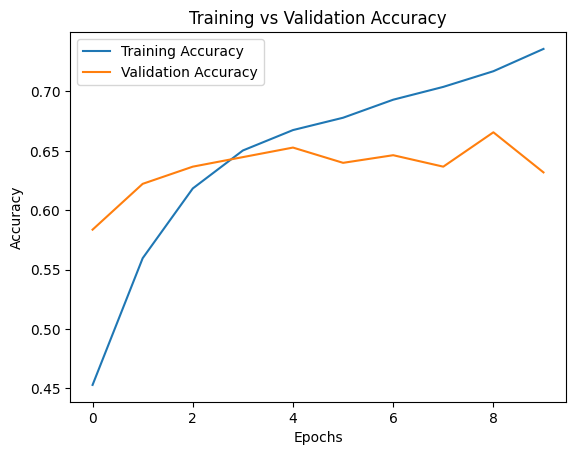

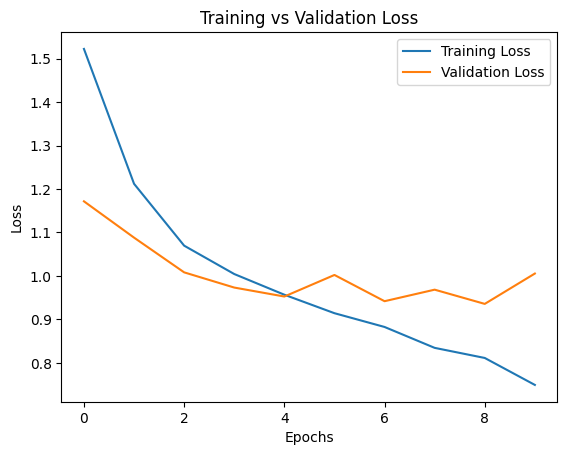

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss curves
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Predict probabilities
test_gen = val_gen
y_pred_probs = model.predict(test_gen)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())


20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step


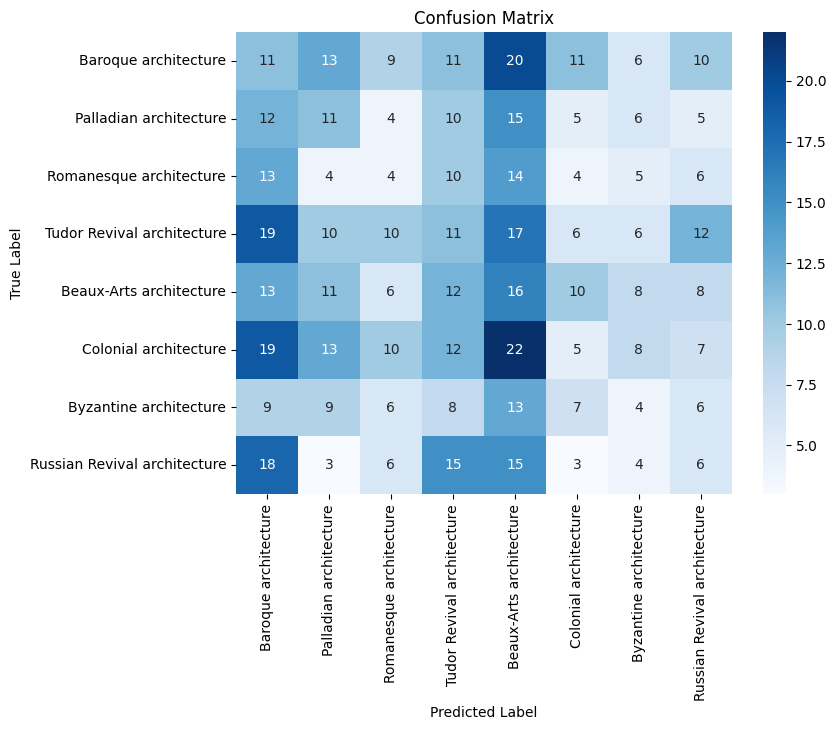

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
test_accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.10932475884244373


In [ ]:
print(train_gen.class_indices)
print(val_gen.class_indices)
print(test_gen.class_indices)


{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}
{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}
{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}


In [ ]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


                              precision    recall  f1-score   support

        Baroque architecture       0.10      0.12      0.11        91
      Palladian architecture       0.15      0.16      0.15        68
     Romanesque architecture       0.07      0.07      0.07        60
  Tudor Revival architecture       0.12      0.12      0.12        91
     Beaux-Arts architecture       0.12      0.19      0.15        84
       Colonial architecture       0.10      0.05      0.07        96
      Byzantine architecture       0.09      0.06      0.07        62
Russian Revival architecture       0.10      0.09      0.09        70

                    accuracy                           0.11       622
                   macro avg       0.11      0.11      0.10       622
                weighted avg       0.11      0.11      0.11       622



In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)


In [9]:
train_gen = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=target_styles,
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=target_styles,
    shuffle=False
)


Found 2502 images belonging to 8 classes.
Found 622 images belonging to 8 classes.


In [10]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # IMPORTANT
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,976 (9.87 MB)

 Trainable params: 329,992 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.1642 - loss: 2.3167 - val_accuracy: 0.4309 - val_loss: 1.6023
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.3581 - loss: 1.7146 - val_accuracy: 0.5289 - val_loss: 1.3789
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.4704 - loss: 1.4974 - val_accuracy: 0.5788 - val_loss: 1.2509
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.5021 - loss: 1.3977 - val_accuracy: 0.6045 - val_loss: 1.1571
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.5626 - loss: 1.2909 - val_accuracy: 0.6190 - val_loss: 1.1025
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5372 - loss: 1.3011 - val_accuracy: 0.6463 - val_loss: 1.0553
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5830 - loss: 1.2080 - val_accuracy: 0.6592 - val_loss: 1.0317
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.5889 - loss: 1.1918 - val_accuracy: 0.6688 - v

In [11]:
base_model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.4844 - loss: 1.4267 - val_accuracy: 0.6785 - val_loss: 0.9116
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.5302 - loss: 1.2682 - val_accuracy: 0.6720 - val_loss: 0.9273
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.5866 - loss: 1.1749 - val_accuracy: 0.6817 - val_loss: 0.9241
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.5946 - loss: 1.1199 - val_accuracy: 0.6768 - val_loss: 0.9225
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.6528 - loss: 1.0203 - val_accuracy: 0.6817 - val_loss: 0.9188
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6462 - loss: 1.0185 - val_accuracy: 0.6897 - val_loss: 0.8969
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.6655 - loss: 0.9743 - val_accuracy: 0.6945 - val_loss: 0.8794
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.6951 - loss: 0.8999 - val_accuracy: 0.6994 - v

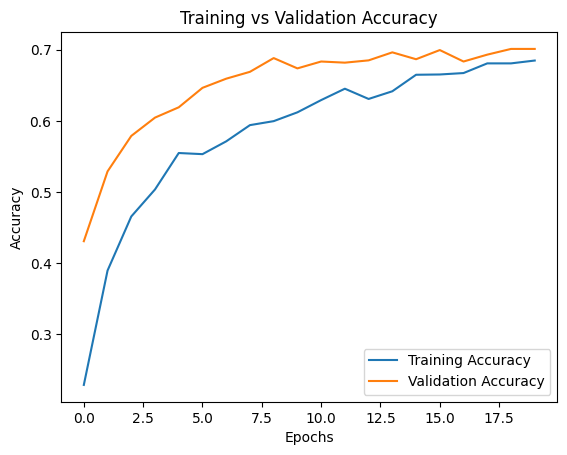

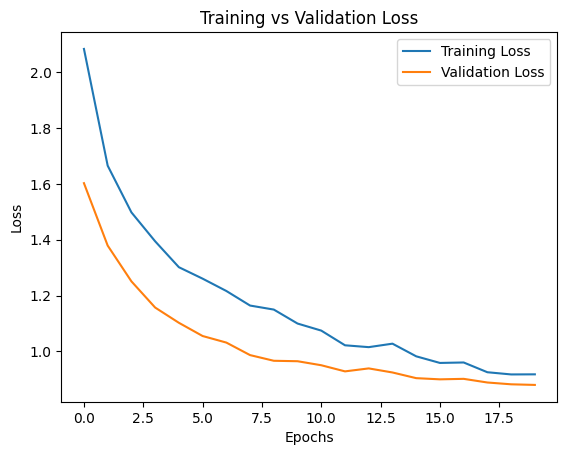

In [12]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss curves
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [13]:
# Predict probabilities
test_gen = val_gen
y_pred_probs = model.predict(test_gen)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


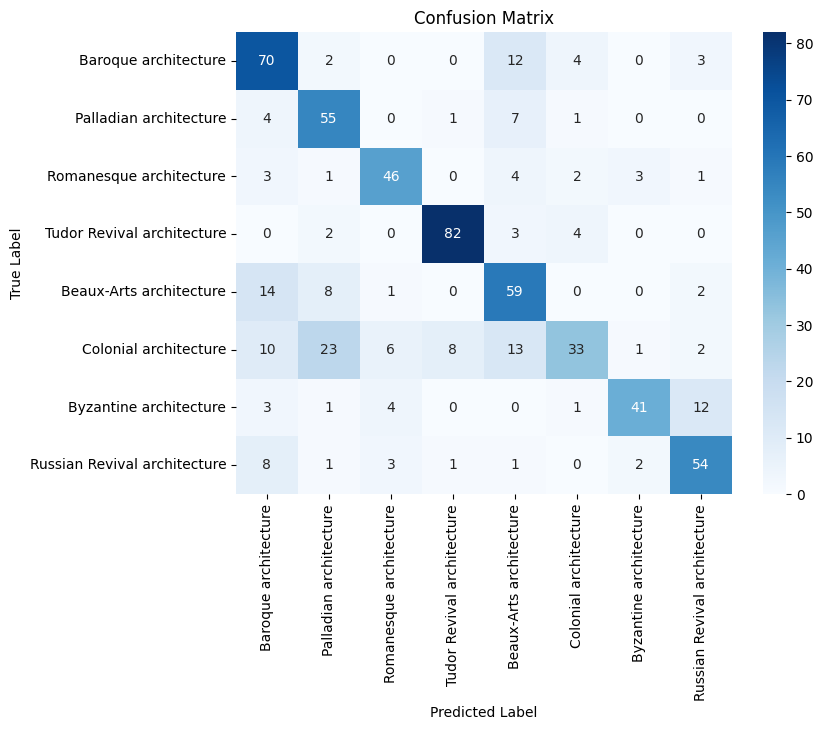

In [14]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [15]:
test_accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy:", test_accuracy)
print(train_gen.class_indices)
print(val_gen.class_indices)
print(test_gen.class_indices)


Test Accuracy: 0.707395498392283
{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}
{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}
{'Baroque architecture': 0, 'Palladian architecture': 1, 'Romanesque architecture': 2, 'Tudor Revival architecture': 3, 'Beaux-Arts architecture': 4, 'Colonial architecture': 5, 'Byzantine architecture': 6, 'Russian Revival architecture': 7}


In [16]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


                              precision    recall  f1-score   support

        Baroque architecture       0.62      0.77      0.69        91
      Palladian architecture       0.59      0.81      0.68        68
     Romanesque architecture       0.77      0.77      0.77        60
  Tudor Revival architecture       0.89      0.90      0.90        91
     Beaux-Arts architecture       0.60      0.70      0.64        84
       Colonial architecture       0.73      0.34      0.47        96
      Byzantine architecture       0.87      0.66      0.75        62
Russian Revival architecture       0.73      0.77      0.75        70

                    accuracy                           0.71       622
                   macro avg       0.73      0.72      0.71       622
                weighted avg       0.72      0.71      0.70       622

